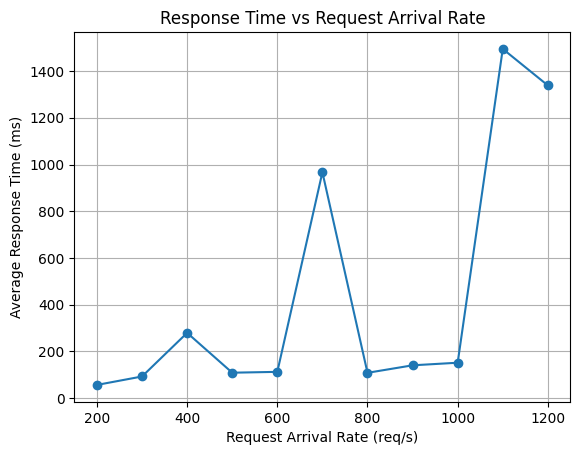

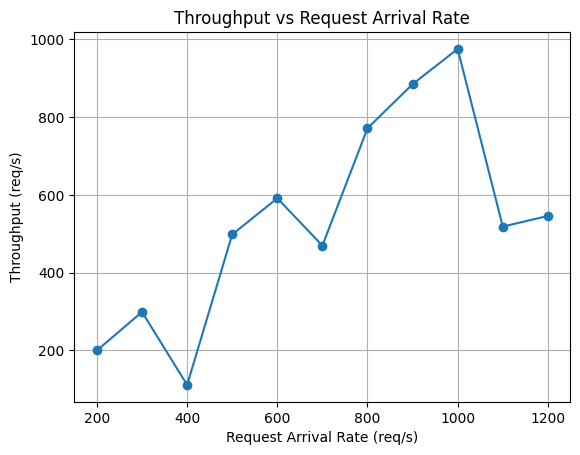

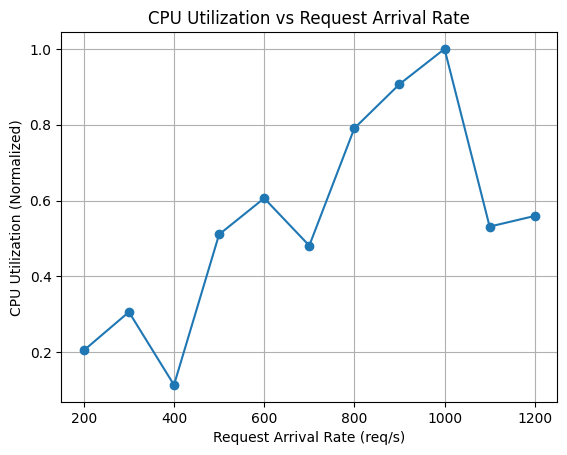

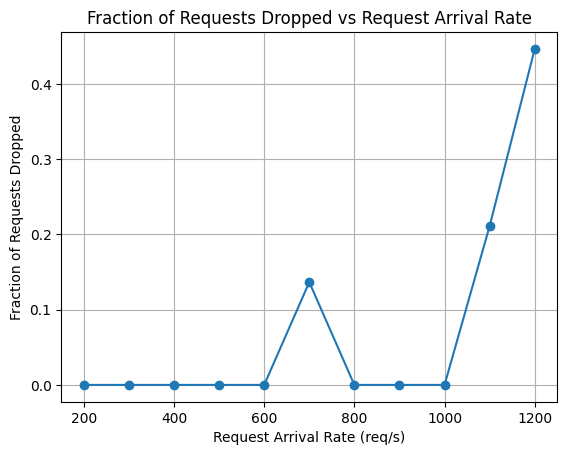

In [6]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# Load httperf output file
# -------------------------------
with open("open-load-test.txt", "r") as f:
    data = f.read()

# -------------------------------
# Parse metrics from httperf output
# -------------------------------
records = []

blocks = data.split("===== RATE:")
for block in blocks[1:]:
    rate = int(block.split("req/s")[0].strip())

    throughput = re.search(r"Reply rate.*avg ([0-9.]+)", block)
    latency = re.search(r"Connection time \[ms\]:.*avg ([0-9.]+)", block)
    errors = re.search(r"Errors: total ([0-9]+)", block)
    replies = re.search(r"replies ([0-9]+)", block)
    requests = re.search(r"requests ([0-9]+)", block)

    records.append({
        "arrival_rate": rate,
        "throughput": float(throughput.group(1)),
        "latency_ms": float(latency.group(1)),
        "errors": int(errors.group(1)),
        "requests": int(requests.group(1)),
        "replies": int(replies.group(1))
    })

df = pd.DataFrame(records)

# -------------------------------
# Derived metric: fraction dropped
# -------------------------------
# df["fraction_dropped"] = (df["requests"] - df["replies"]) / df["requests"]

# -------------------------------
# 1. Response Time vs Arrival Rate
# -------------------------------
plt.figure()
plt.plot(df["arrival_rate"], df["latency_ms"], marker='o')
plt.xlabel("Request Arrival Rate (req/s)")
plt.ylabel("Average Response Time (ms)")
plt.title("Response Time vs Request Arrival Rate")
plt.grid(True)
plt.show()

# -------------------------------
# 2. Throughput vs Arrival Rate
# -------------------------------
plt.figure()
plt.plot(df["arrival_rate"], df["throughput"], marker='o')
plt.xlabel("Request Arrival Rate (req/s)")
plt.ylabel("Throughput (req/s)")
plt.title("Throughput vs Request Arrival Rate")
plt.grid(True)
plt.show()

# -------------------------------
# 3. CPU Utilization vs Arrival Rate
# -------------------------------
# Approximate CPU utilization using Utilization Law:
# U ≈ throughput / max_throughput
max_throughput = df["throughput"].max()
df["cpu_util"] = df["throughput"] / max_throughput

plt.figure()
plt.plot(df["arrival_rate"], df["cpu_util"], marker='o')
plt.xlabel("Request Arrival Rate (req/s)")
plt.ylabel("CPU Utilization (Normalized)")
plt.title("CPU Utilization vs Request Arrival Rate")
plt.grid(True)
plt.show()

# -------------------------------
# 4. Fraction Dropped vs Arrival Rate
# -------------------------------
# plt.figure()
# plt.plot(df["arrival_rate"], df["fraction_dropped"], marker='o')
# plt.xlabel("Request Arrival Rate (req/s)")
# plt.ylabel("Fraction of Requests Dropped")
# plt.title("Dropped Requests vs Request Arrival Rate")
# plt.grid(True)
# plt.show()



arrival_rate = [200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

# From httperf output
requests_sent = [5000] * len(arrival_rate)
replies_received = [
    5000,  # 200
    5000,  # 300
    5000,  # 400
    5000,  # 500
    5000,  # 600
    4317,  # 700
    5000,  # 800
    5000,  # 900
    5000,  # 1000
    3944,  # 1100
    2767   # 1200
]

# Fraction of requests dropped
fraction_dropped = [
    (req - rep) / req
    for req, rep in zip(requests_sent, replies_received)
]

# Plot
plt.figure()
plt.plot(arrival_rate, fraction_dropped, marker='o')
plt.xlabel("Request Arrival Rate (req/s)")
plt.ylabel("Fraction of Requests Dropped")
plt.title("Fraction of Requests Dropped vs Request Arrival Rate")
plt.grid(True)
plt.show()